In [1]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
torchvision.__version__

2.0.1+cu118


'0.15.2+cu118'

In [2]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),  ##we imported torch.transforms.ToTensor
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),  ##we imported torch.transforms.ToTensor
    target_transform = None
)


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image.shape, label  ##label is integer not tensor

(torch.Size([1, 28, 28]), 9)

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
##python way my practice
class_to_idx = {}
for value,key in enumerate(class_names):
  class_to_idx[key] = value
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
#pytorch way
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
f"image shape: {image.shape} [Color channels, height, width]"

'image shape: torch.Size([1, 28, 28]) [Color channels, height, width]'

In [9]:
f'{class_names[label]}',label

('Ankle boot', 9)

In [10]:
train_data.targets  ##targets are pytorch way of saying labels

tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
train_data.targets.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
torch.count_nonzero(image)

tensor(433)

torch.Size([1, 28, 28])


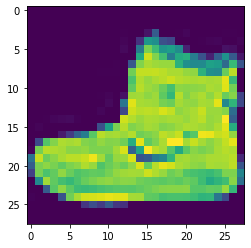

In [13]:
##visualize
print(image.shape)
plt.imshow(image.squeeze())

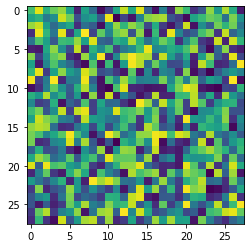

In [14]:
##my practice
im = torch.rand(28,28)
plt.imshow(im)

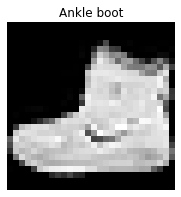

In [15]:
plt.figure(figsize=(3,5))
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False);

In [16]:
##my practice
import random
print(f"a random number: {random.randint(0,len(train_data))},\na random number: {random.randrange(0,len(train_data))},\n5 random numbers: {random.sample(range(0,len(train_data)),5)}")

a random number: 49151,
a random number: 34758,
5 random numbers: [34105, 21578, 15195, 13268, 27369]


In [17]:
import random

random_idx = random.randint(0,len(train_data))
random_idx

5109

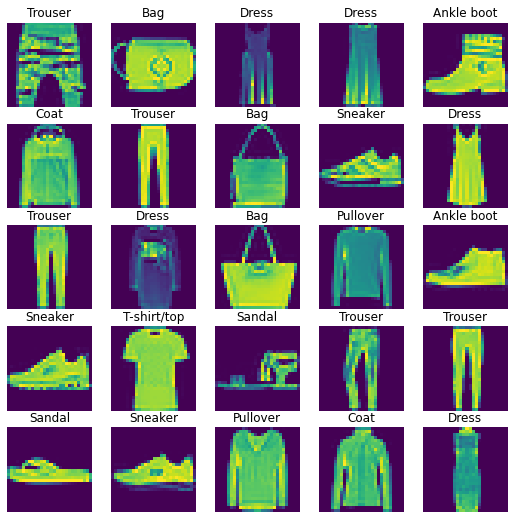

In [18]:
plt.figure(figsize=(9,9))
row,col=5,5
for i in range(1,row*col+1):
    random_idx = random.randint(0,len(train_data))
    img, target = train_data[random_idx]
    plt.subplot(row,col,i)
    plt.imshow(img.squeeze(0))
    plt.title(class_names[target])
    plt.axis(False)
    

In [19]:
##more practice
random_idx = torch.randint(0,len(train_data),size=(1,)).item()
random_idx

45118

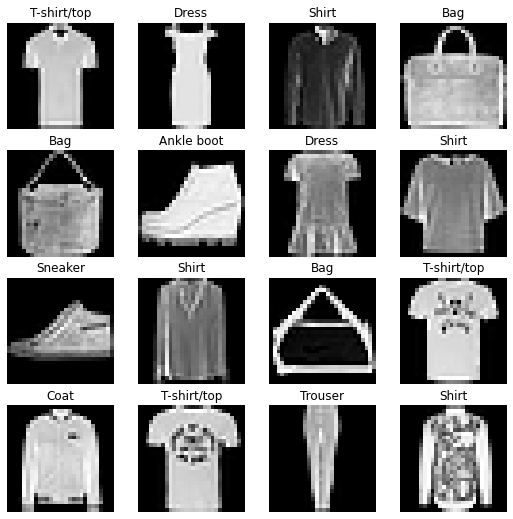

In [20]:
fig = plt.figure(figsize=(9,9))
rows,cols =4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


In [21]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [22]:
# from traitlets.config import T
###dataloader

from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset = train_data,
    batch_size =  BATCH_SIZE,
    shuffle= True
)
test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle=False
)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1b66f29c700>,
 <torch.utils.data.dataloader.DataLoader at 0x1b66f29cdf0>)

In [23]:
f"train_data_loader: {len(train_dataloader)} baches of {BATCH_SIZE},test_data_loader: {len(test_dataloader)} baches of {BATCH_SIZE}"

'train_data_loader: 1875 baches of 32,test_data_loader: 313 baches of 32'

In [24]:
train_features_batch,train_label_batch = next(iter(train_dataloader))
train_features_batch.shape,train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [25]:
len(train_dataloader)

1875

In [26]:
len(train_features_batch)

32

In [27]:
random_idx = torch.randint(0,len(train_features_batch),size=(1,))
random_idx

tensor([24])

In [28]:
train_features_batch[random_idx]

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0980, 0.1490, 0.1490, 0.1176, 0.1294, 0.1686, 0.1176, 0.0902,
           0.1176, 0.2196, 0.1412, 0.1294, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.2706,
           0.2392, 0.1804, 0.0902, 0.2196, 0.4314, 0.2392, 0.2824, 0.3216,
           0.4431, 0.2706, 0.1294, 0.3020, 0.3098, 0.0706, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3216, 0.1686,
           0.0471, 0.0588, 0.1882, 0.6745, 0.8667, 0.5216, 0.6431, 0.8078,
           0.4941, 0.2196, 0.3804, 0.0980, 0.2824, 0.4314, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4824, 0.1294,
           0.0392, 0.0000, 0.0196, 0.0078, 0.1294, 0.6863, 0.8353, 0.2902,
           0.0000, 0.0000, 0.1098, 0.1686, 

In [29]:
img,label = train_features_batch[random_idx],train_label_batch[random_idx],
img.shape,label.shape

(torch.Size([1, 1, 28, 28]), torch.Size([1]))

In [30]:
img.squeeze().shape
print(f'{img.shape}')
print(f'{label},{label.shape}')

torch.Size([1, 1, 28, 28])
tensor([4]),torch.Size([1])


Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


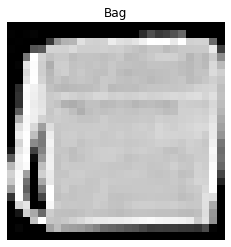

In [31]:
# torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=(1,)).item()
img,label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray"),
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [32]:
train_features_batch.shape

torch.Size([32, 1, 28, 28])

In [33]:
flatten_model = nn.Flatten()
x = train_features_batch
output = flatten_model(x).shape
output

torch.Size([32, 784])

In [34]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,out_features=hidden_units),
        nn.Linear(hidden_units,output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [35]:
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names))
model_0.to("cpu")  #for now
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0050, -0.0129,  0.0181,  ...,  0.0036,  0.0174,  0.0003],
                      [ 0.0224, -0.0292, -0.0051,  ...,  0.0110,  0.0247,  0.0200],
                      [ 0.0254, -0.0195,  0.0199,  ...,  0.0001, -0.0274, -0.0094],
                      ...,
                      [-0.0263,  0.0308, -0.0354,  ..., -0.0051,  0.0115,  0.0047],
                      [ 0.0324, -0.0329, -0.0123,  ..., -0.0081, -0.0100, -0.0004],
                      [ 0.0331,  0.0032, -0.0254,  ...,  0.0194,  0.0167, -0.0350]])),
             ('layer_stack.1.bias',
              tensor([-0.0213, -0.0354,  0.0120, -0.0185, -0.0195,  0.0143,  0.0314,  0.0277,
                       0.0143, -0.0109])),
             ('layer_stack.2.weight',
              tensor([[-0.1151,  0.0215, -0.0846, -0.0022,  0.2288, -0.2517, -0.1370, -0.3133,
                       -0.2693, -0.2533],
                      [-0.1824, -0.1860, -0.2019, -0.0879,  0.1783, -0.2653,  0.

In [36]:
import requests
from pathlib import Path

if Path('helper_function.py').is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb")as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [37]:
from pathlib import Path
Path.cwd()

WindowsPath('C:/Users/pouya/jupyter projects/PyTorch_for Deep Learning_Machine Learning')

In [38]:
from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [39]:
from timeit import default_timer as timer

def print_train_time(start,end,device=None):
  """prints train timedifference between start and finish

  args:
    start(float):start time of computation
    end(float):end time of computation
    device([type],optional)
  return:
    float:total time of computation
    """
  total_time = end - start
  print(f"total train time on {device} took {total_time:.3f} seconds")
  return total_time


In [40]:
for X, y in train_dataloader:
    print(X.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 2

torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 2

torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 2

torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 2

torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 2

torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 2

torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 2

In [41]:
from tqdm.auto import tqdm

torch.manual_seed(42)

epochs = 3
train_start_time = timer()
for epoch in tqdm(range(epochs)):
  print(f'epoch: {epoch}\n-------')
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)

  with torch.inference_mode():
    model_0.eval()
    test_loss,test_acc = 0,0
    for X,y in test_dataloader:

      test_logits = model_0(X)
      test_preds = test_logits.argmax(dim=1)

      loss = loss_fn(test_logits,y)
      test_loss += loss

      test_acc += accuracy_fn(y,test_preds)

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\ntrain_loss= {train_loss:0.5f}|test_loss={test_loss:0.5f}|test acc= {test_acc:0.2f}%\n")
train_end_time = timer()

total_train_time_model_0 = print_train_time(train_start_time,train_end_time,
                 device = str(next(model_0.parameters()).device))
total_train_time_model_0




  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
-------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

train_loss= 0.59634|test_loss=0.50852|test acc= 82.35%

epoch: 1
-------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

train_loss= 0.48123|test_loss=0.48303|test acc= 83.22%

epoch: 2
-------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

train_loss= 0.45785|test_loss=0.48172|test acc= 83.36%

total train time on cpu took 42.955 seconds


42.95529689999967

In [42]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [43]:
def eval_model(
    model,
    data_loader,
    loss_fn,
    accuracy_fn,
    device=device
    ):
  """Returns a dictionary containing the results of model predicting on data_loader.

  Args:
    model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
    data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
    loss_fn (torch.nn.Module): The loss function of model.
    accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
  Return:
    (dict): Results of model making predictions on data_loader.
  """
  loss,acc = 0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device),y.to(device)
      y_pred = model(X)

      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y,y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {
      "model":model.__class__.__name__,
      "loss":loss.item(),
      "accuracy":acc
  }

model_0_results = eval_model(
    model_0,
    test_dataloader,
    loss_fn,
    accuracy_fn
)
model_0_results

{'model': 'FashionMNISTModelV0',
 'loss': 0.48172104358673096,
 'accuracy': 83.35662939297124}

In [44]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [45]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()

    )

  def forward(self,x):
    return self.layer_stack(x)

In [46]:
model_1 = FashionMNISTModelV1(
    28*28,
    10,
    len(class_names)
).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [47]:
import requests
from pathlib import Path

if Path('helper_function.py').is_file():
  print('already downloaded')
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)

already downloaded


In [48]:
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [49]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [50]:
# def train_step(model: torch.nn.Module,
#                data_loader: torch.utils.data.DataLoader,
#                loss_fn: torch.nn.Module,
#                optimizer: torch.optim.Optimizer,
#                accuracy_fn,
#                device: torch.device = device):

#   train_loss,train_acc = 0,0
#   model.to(device)
#   for batch, (X,y) in enumerate(data_loader):
#     X,y = X.to(device),y.to(device)
#     y_pred = model(X)

#     train_loss += loss_fn(y_pred,y)
#     train_acc += accuracy_fn(y,y_pred.argmax(dim=1))

#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     if batch % 400 == 0:
#       print(f"looked at {batch*len(X)}/{len(data_loader.dataset)} samples")

#   train_loss /= len(data_loader)
#   train_acc /= len(data_loader)

#   print(f"train_loss: {train_loss:0.5f}, train_accuracy: {train_acc:0.2f}")


# def test_step(data_loader,model,loss_fn,accuracy_fn,device=device):

#   test_loss,test_acc = 0,0
#   model.to(device)
#   model.eval()
#   with torch.inference_mode():

#     for X,y in data_loader:
#       X,y = X.to(device),y.to(device)
#       test_pred = model(X)

#       test_loss += loss_fn(test_pred,y)
#       test_acc += accuracy_fn(y,test_pred.argmax(dim=1))

#     test_loss /= len(data_loader)
#     test_acc /= len(data_loader)

#     print(f"test loss:{test_loss:0.5f},acc loss:{test_acc:0.2f}%")


# # model1_train = train_step(model_1,train_dataloader,loss_fn,accuracy_fn,optimizer)
# # model1_train


In [51]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [52]:
torch.manual_seed(42)

from timeit import default_timer as timer
epochs = 3
train_start_time_gpu = timer()
for epoch in tqdm(range(epochs)):
  print(f"epoch:{epoch}\n------")
  train_step(model_1,train_dataloader,loss_fn,optimizer,accuracy_fn)

  test_step(test_dataloader,model_1,loss_fn,accuracy_fn)

train_end_time_gpu = timer()

total_train_time_model_1 = print_train_time(train_start_time_gpu,train_end_time_gpu,device=device)
total_train_time_model_1

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
------
Train loss: 0.92895 | Train accuracy: 70.44%
Test loss: 0.54209 | Test accuracy: 80.53%

epoch:1
------
Train loss: 0.49877 | Train accuracy: 82.03%
Test loss: 0.50371 | Test accuracy: 82.17%

epoch:2
------
Train loss: 0.46250 | Train accuracy: 83.21%
Test loss: 0.48537 | Test accuracy: 83.05%

total train time on cuda took 48.112 seconds


48.11220740000044

In [53]:
model_1_results = eval_model(model_1,test_dataloader,loss_fn,accuracy_fn)
model_1_results,model_0_results

({'model': 'FashionMNISTModelV1',
  'loss': 0.48537465929985046,
  'accuracy': 83.04712460063898},
 {'model': 'FashionMNISTModelV0',
  'loss': 0.48172104358673096,
  'accuracy': 83.35662939297124})

In [54]:
import pandas as pd

df = pd.DataFrame([
    model_0_results,
    model_1_results],
                  # index = ['loss']
)
df
# df.set_index('loss')

,model,loss,accuracy
0,FashionMNISTModelV0,0.481721,83.356629
1,FashionMNISTModelV1,0.485375,83.047125


In [55]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units,
                  hidden_units,
                  3,1,1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)

    )
    self.block_2 = nn.Sequential(
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=1),
    nn.ReLU(),
    nn.Conv2d(hidden_units,
              hidden_units,
              3,1,1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,
                  stride=2)

    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden_units*7*7,
                  output_shape)
    )

  def forward(self,x):
    x = self.block_1(x)
    x = self.block_2 (x)
    x = self.classifier(x)
    return x




In [56]:
torch.manual_seed(2)

model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2


FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [57]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [58]:
eval_model(model_2,test_dataloader,loss_fn,accuracy_fn)

{'model': 'FashionMNISTModelV2',
 'loss': 2.3040571212768555,
 'accuracy': 10.013977635782748}

In [59]:
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
test_image.shape

torch.Size([3, 64, 64])

In [60]:
conv_layer = nn.Conv2d(3,10,
                         kernel_size=4,
                         stride=1,
                         padding=0)
conv_layer(test_image).shape

torch.Size([10, 61, 61])

In [61]:
conv_layer.state_dict()

OrderedDict([('weight',
              tensor([[[[-0.0554, -0.1305,  0.0105,  0.0288],
                        [-0.0331,  0.1211, -0.0312, -0.0252],
                        [ 0.0608, -0.0867,  0.1048, -0.0840],
                        [-0.0329,  0.0313, -0.1197,  0.0346]],
              
                       [[ 0.1070,  0.1153, -0.0033, -0.1201],
                        [ 0.0324,  0.1377, -0.0246, -0.0185],
                        [-0.1099, -0.0263, -0.0926, -0.1054],
                        [-0.1145,  0.1149, -0.0667,  0.0695]],
              
                       [[-0.0441, -0.1291,  0.0566,  0.0352],
                        [ 0.1165,  0.1417, -0.0281, -0.0042],
                        [-0.0841, -0.0451,  0.0208, -0.1197],
                        [ 0.0110,  0.0685,  0.0800, -0.0809]]],
              
              
                      [[[ 0.1228,  0.0026,  0.1241, -0.0404],
                        [ 0.0445, -0.0198,  0.0585, -0.1325],
                        [-0.1078,  0.1313,  

In [62]:
conv_layer.weight.shape,conv_layer.bias.shape

(torch.Size([10, 3, 4, 4]), torch.Size([10]))

In [63]:
image_through_conv = conv_layer(test_image)
maxpool_layer = nn.MaxPool2d(kernel_size=5)
image_through_conv_max = maxpool_layer(image_through_conv)

test_image.shape,image_through_conv.shape,image_through_conv_max.shape

(torch.Size([3, 64, 64]), torch.Size([10, 61, 61]), torch.Size([10, 12, 12]))

In [64]:
image_through_conv2 = conv_layer(test_image)
avgpool_layer = nn.AvgPool2d(kernel_size=5)
image_through_conv_avg = avgpool_layer(image_through_conv2)

test_image.shape,image_through_conv2.shape,image_through_conv_avg.shape

(torch.Size([3, 64, 64]), torch.Size([10, 61, 61]), torch.Size([10, 12, 12]))

In [65]:
import time
from tqdm.auto import tqdm

train_time_start = time.perf_counter()

epochs = 3

# for epoch in tqdm(range(epochs)):
#     train_step(model_2,
#                train_dataloader,
#                loss_fn,
#                optimizer,
#                accuracy_fn
#               )
#     test_step(model=model_2,
#                data_loader=test_dataloader,
#                loss_fn,
#                optimizer,
#                accuracy_fn
#               )

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )


train_time_end = time.perf_counter()


total_train_time_model_2  = print_train_time(train_time_start,train_time_end)


print(f"total train time on {device} took {train_time_end - train_time_start:.3f} seconds")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.58431 | Train accuracy: 78.70%
Test loss: 0.43158 | Test accuracy: 84.15%

Epoch: 1
---------
Train loss: 0.36069 | Train accuracy: 87.12%
Test loss: 0.37823 | Test accuracy: 86.55%

Epoch: 2
---------
Train loss: 0.32363 | Train accuracy: 88.25%
Test loss: 0.31690 | Test accuracy: 88.41%

total train time on None took 54.065 seconds
total train time on cuda took 54.065 seconds


In [66]:
model_2_results = eval_model(model_2,test_dataloader,loss_fn,accuracy_fn,device="cuda")
model_2_results

{'model': 'FashionMNISTModelV2',
 'loss': 0.31690478324890137,
 'accuracy': 88.40854632587859}

In [67]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,model_1_results,model_2_results])
compare_results

,model,loss,accuracy
0,FashionMNISTModelV0,0.481721,83.356629
1,FashionMNISTModelV1,0.485375,83.047125
2,FashionMNISTModelV2,0.316905,88.408546


In [68]:
compare_results["training time"] = [total_train_time_model_0,total_train_time_model_1,total_train_time_model_2      
]
compare_results

,model,loss,accuracy,training time
0,FashionMNISTModelV0,0.481721,83.356629,42.955297
1,FashionMNISTModelV1,0.485375,83.047125,48.112207
2,FashionMNISTModelV2,0.316905,88.408546,54.064630


In [69]:
compare_results.set_index("model")["accuracy"]

model
FashionMNISTModelV0    83.356629
FashionMNISTModelV1    83.047125
FashionMNISTModelV2    88.408546
Name: accuracy, dtype: float64

In [70]:
compare_results.set_index("model")["accuracy"]

model
FashionMNISTModelV0    83.356629
FashionMNISTModelV1    83.047125
FashionMNISTModelV2    88.408546
Name: accuracy, dtype: float64

Text(0, 0.5, 'model')

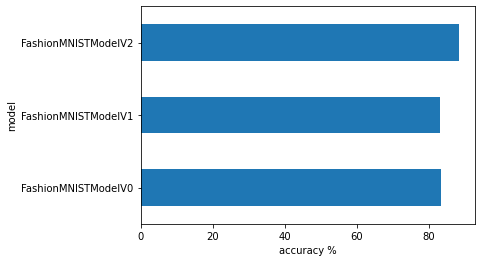

In [71]:
compare_results.set_index("model")["accuracy"].plot(kind="barh")  ##try width=0.2
# plt.barh(compare_results.set_index("model")["accuracy"],width=0.2)
plt.xlabel("accuracy %")
plt.ylabel("model")

In [72]:
def make_predictions(model: torch.nn.Module,data: list,device=device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            test_pred = model(sample)
            test_pred_label = torch.argmax(torch.softmax(test_pred,dim=1),dim=1)

            pred_probs.append(test_pred_label.cpu())
    print(pred_probs)
    return torch.hstack(pred_probs)
        

In [73]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

print(f"test sample image shape: {test_samples[0].shape}\ntest sample label: {class_names[test_labels[0]]} ")

test sample image shape: torch.Size([1, 28, 28])
test sample label: Sandal 


In [74]:
pred_classes = make_predictions(model_2,test_samples)
pred_classes

[tensor([5]), tensor([1]), tensor([7]), tensor([4]), tensor([3]), tensor([0]), tensor([4]), tensor([7]), tensor([1])]


tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [75]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

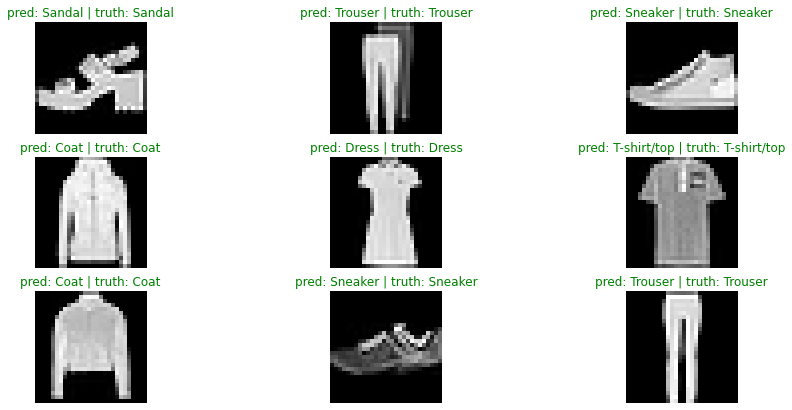

In [76]:
plt.figure(figsize=(15,7))

row,col=3,3
for i, sample in enumerate(test_samples):    
    plt.subplot(row,col,i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f"pred: {pred_label} | truth: {truth_label}"
    
    if pred_label == truth_label:
        plt.title(title_text,fontsize=12,c="g")
    else:
        plt.title(title_text,font_size=12,c="r")
        
    plt.axis(False);    

In [77]:
model_2.eval()
y_preds = []

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="making predictions"):
        X, y = X.to(device), y.to(device)
        
        logit = model_2(X)
        y_label = torch.softmax(logit, dim=1).argmax(dim=1)
        y_preds.append(y_label.cpu())
y_pred_tensor = torch.cat(y_preds)

# y_preds
y_pred_tensor   ##for 10k samples
        

making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [78]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")


C:\Users\pouya\AppData\Roaming\Python\Python39\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


mlxtend version: 0.22.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


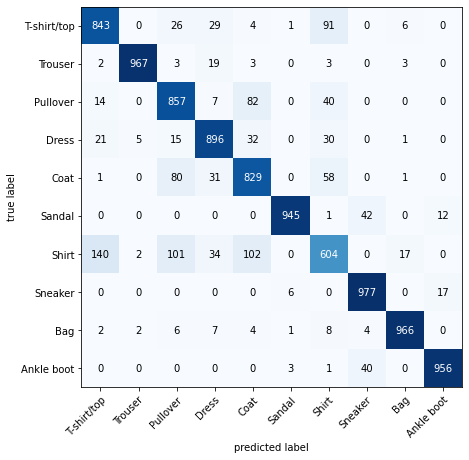

In [79]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names = class_names,
                                figsize=(15,7)
                                
                           )

In [80]:
from pathlib import Path

model_path = Path(r"C:\Users\pouya\jupyter projects\PyTorch_for Deep Learning_Machine Learning\Model")
model_path.mkdir(parents=True,
                exist_ok=True)

model_name = "computerVision_model_2.pth"
model_save_path = model_path/model_name

torch.save(obj=model_2.state_dict(),
          f=model_save_path)

In [81]:
loaded_model_2 = FashionMNISTModelV2(1,10,len(class_names))

loaded_model_2.load_state_dict(torch.load(f=model_save_path))

loaded_model_2 = loaded_model_2.to(device)

In [82]:
loaded_model2_results = eval_model(loaded_model_2,
                                   test_dataloader,
                                   loss_fn,
                                   accuracy_fn
                                  )
loaded_model2_results

{'model': 'FashionMNISTModelV2',
 'loss': 0.31690478324890137,
 'accuracy': 88.40854632587859}

In [83]:
model_2_results   ###it worked 

{'model': 'FashionMNISTModelV2',
 'loss': 0.31690478324890137,
 'accuracy': 88.40854632587859}

In [84]:
torch.isclose(
    torch.tensor(model_2_results["accuracy"]),
    torch.tensor(loaded_model2_results["accuracy"]),
    atol = 1e-8,
    rtol = 1e-4)

tensor(True)

In [85]:
torch.isclose(
    torch.tensor(model_2_results["loss"]),
    torch.tensor(loaded_model2_results["loss"]),
    atol = 1e-8,
    rtol = 1e-4)

tensor(True)

In [86]:
1e-4 == 0.0001

True

In [87]:
###one more time

def make_predictions(model, data_list):
    model_2.eval()
    with torch.inference_mode():
        pred_labels = []
        for sample in data_list:
            logit = model(sample.unsqueeze(0).to(device))
            pred_label = torch.softmax(logit,dim=1).argmax(dim=1)
            pred_labels.append(pred_label)

        return torch.cat(pred_labels)

In [88]:
import random
random.seed(42)

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=12):
    test_samples.append(sample)
    test_labels.append(label)
    
len(test_samples)  

12

In [89]:
pred_labels = make_predictions(model_2,test_samples)
pred_labels

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2], device='cuda:0')

In [90]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2]

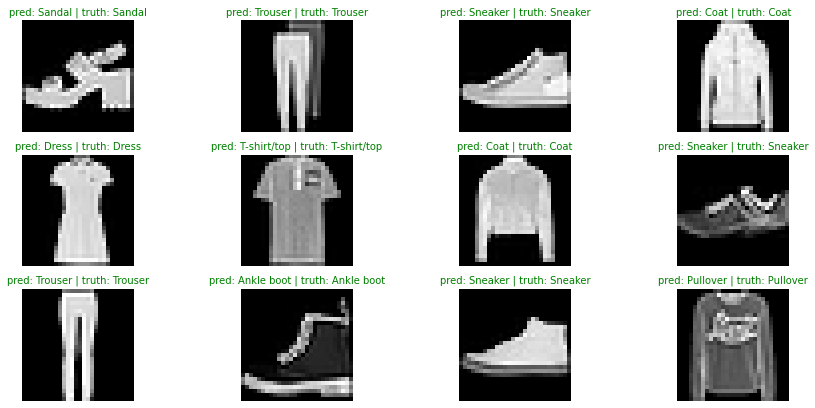

In [91]:
def plot_predictions(train_data,test_samples,test_labels):

    plt.figure(figsize=(15,7))
    for i, sample in enumerate(test_samples):
        plt.subplot(3,4,i+1)
        class_names = train_data.classes
        pred_label = class_names[pred_labels[i]]
        truth_label = class_names[test_labels[i]]
        
        title_text = f"pred: {pred_label} | truth: {truth_label}"
        plt.imshow(sample.squeeze(), cmap="gray")
        if pred_label == truth_label:
            plt.title(title_text, fontsize=10,c = "g" )
        else:
            plt.title(title_text, fontsize=10,c = "r" )
            
        plt.axis(False);
        
plot_predictions(train_data, test_samples, test_labels)

In [92]:
model_2.eval()

with torch.inference_mode():
    pred_labels = []
    for X, y in tqdm(test_dataloader, desc="making predicitons"):
        X,y = X.to(device), y.to(device)
        logit = model_2(X)
        pred_prob = torch.softmax(logit, dim=1)
        pred_label = torch.argmax(pred_prob,dim=1)
        
        pred_labels.append(pred_label.cpu())
        
y_pred_tensor = torch.cat(pred_labels)  
y_pred_tensor

making predicitons:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [93]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

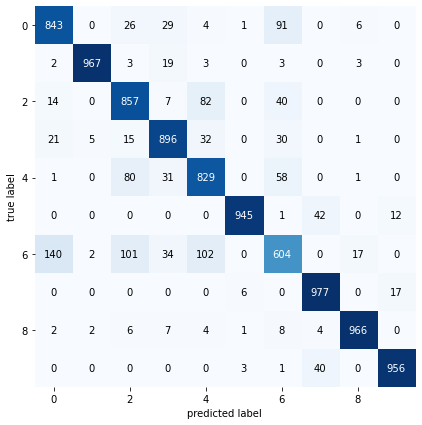

In [94]:
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

confmat = ConfusionMatrix(num_classes = len(class_names), task= "multiclass")
confmat_tensor = confmat(y_pred_tensor,
                        test_data.targets)

fig, ax = plot_confusion_matrix(confmat_tensor.numpy(),
                           class_names,
                               figsize=(10,7))

In [95]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])